In [11]:
import pandas as pd
import numpy as np


In [12]:
from google.colab import files
uploaded = files.upload()


Saving reviews.csv to reviews (1).csv


In [16]:
df = pd.read_csv("reviews.csv")
df

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewText  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


In [19]:
print(df["ReviewText"].isnull().sum())


0


In [21]:
df = df.dropna(subset=["ReviewText"])
df.reset_index(drop=True, inplace=True)
df


,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


In [26]:
df["TextLength"] = df["ReviewText"].str.len()
print(df)

                                   ReviewText  TextLength
0    This product is amazing and very useful!          40
1  I didn’t like the quality of the material.          42
2                       Good value for money.          21
3       Terrible experience, won’t buy again.          37
4                        Absolutely loved it!          20
5           The product broke after one week.          33
6          Really happy with the performance.          34
7                        Not worth the price.          20
8  Excellent build quality and fast delivery.          42
9           Disappointing experience overall.          33


In [27]:
df["WordCount"] = df["ReviewText"].str.split().str.len()
print(df)

                                   ReviewText  TextLength  WordCount
0    This product is amazing and very useful!          40          7
1  I didn’t like the quality of the material.          42          8
2                       Good value for money.          21          4
3       Terrible experience, won’t buy again.          37          5
4                        Absolutely loved it!          20          3
5           The product broke after one week.          33          6
6          Really happy with the performance.          34          5
7                        Not worth the price.          20          4
8  Excellent build quality and fast delivery.          42          6
9           Disappointing experience overall.          33          3


In [32]:
all_text = " ".join(df["ReviewText"].astype(str))

print(all_text)

len(all_text)


This product is amazing and very useful! I didn’t like the quality of the material. Good value for money. Terrible experience, won’t buy again. Absolutely loved it! The product broke after one week. Really happy with the performance. Not worth the price. Excellent build quality and fast delivery. Disappointing experience overall.


331

In [35]:
import re

all_text_cleaned = all_text.lower()

all_text_cleaned = re.sub(r"[^a-z0-9\s]", " ", all_text)

print(all_text_cleaned)

len(all_text_cleaned)

this product is amazing and very useful  i didn t like the quality of the material  good value for money  terrible experience  won t buy again  absolutely loved it  the product broke after one week  really happy with the performance  not worth the price  excellent build quality and fast delivery  disappointing experience overall 


331

In [38]:
tokens = all_text.split()
print(tokens)
len(tokens)


['this', 'product', 'is', 'amazing', 'and', 'very', 'useful', 'i', 'didn', 't', 'like', 'the', 'quality', 'of', 'the', 'material', 'good', 'value', 'for', 'money', 'terrible', 'experience', 'won', 't', 'buy', 'again', 'absolutely', 'loved', 'it', 'the', 'product', 'broke', 'after', 'one', 'week', 'really', 'happy', 'with', 'the', 'performance', 'not', 'worth', 'the', 'price', 'excellent', 'build', 'quality', 'and', 'fast', 'delivery', 'disappointing', 'experience', 'overall']


53

In [39]:
stopwords = {"the", "and", "is", "to", "a", "of", "in", "for", "it", "this", "that"}

tokens_filtered = [w for w in tokens if w not in stopwords]
print(tokens_filtered)
len(tokens_filtered)


['product', 'amazing', 'very', 'useful', 'i', 'didn', 't', 'like', 'quality', 'material', 'good', 'value', 'money', 'terrible', 'experience', 'won', 't', 'buy', 'again', 'absolutely', 'loved', 'product', 'broke', 'after', 'one', 'week', 'really', 'happy', 'with', 'performance', 'not', 'worth', 'price', 'excellent', 'build', 'quality', 'fast', 'delivery', 'disappointing', 'experience', 'overall']


41

In [58]:
df_tokens = pd.DataFrame({"word": tokens_filtered})
df_tokens_counts = df_tokens.groupby("word").size().sort_values(ascending=False)
display(df_tokens_counts)


,0
word,
experience,2
quality,2
t,2
product,2
absolutely,1
broke,1
amazing,1
again,1
after,1


In [70]:
token_counts_df = pd.Series(tokens_filtered).value_counts()
top_10_words = df_tokens_counts.head(10).reset_index(drop=False)
top_10_words.columns = ["Word", "Frequency"]
top_10_words


,Word,Frequency
0,experience,2
1,quality,2
2,t,2
3,product,2
4,absolutely,1
5,broke,1
6,amazing,1
7,again,1
8,after,1
9,didn,1


/tmp/ipython-input-14281383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_words, x="Word", y="Frequency", palette="viridis")


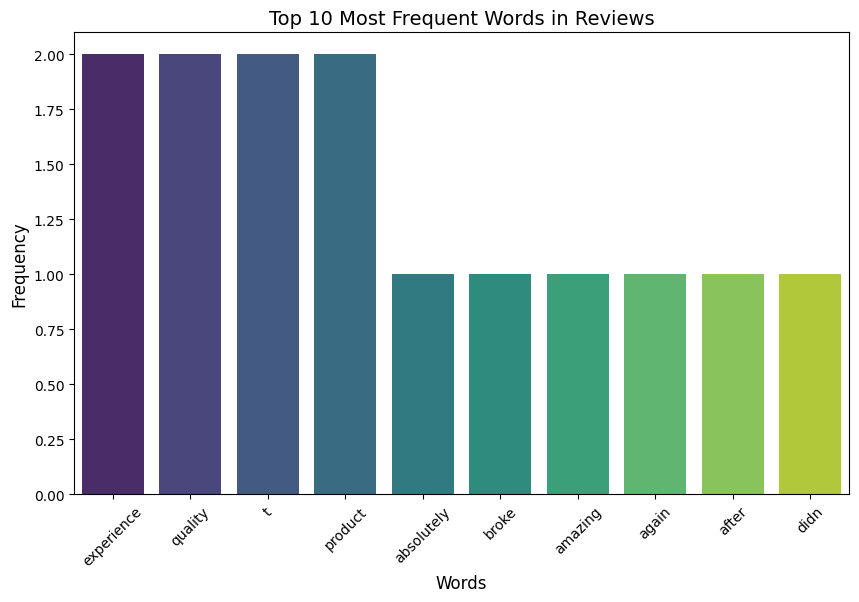

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_words, x="Word", y="Frequency", palette="viridis")

plt.title("Top 10 Most Frequent Words in Reviews", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(rotation=45)
plt.show()
